## Iris Flower Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Perform Basic Data Quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

3

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df.duplicated().sum()

0

## Descriptive Analytics

Datatypes

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


## Feature Engineering
    1. Separate X and Y features. 'Species' is out target feature(Y)
    2. Plot the species column to see how data is distributed
    3. Perform label encoding on Y

Separate X and Y features

In [14]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
Y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Data Visualization - Plot species column to see how data is distributed

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
Y.value_counts()

species        
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: title={'center': 'Species Pie chart'}, ylabel='count'>

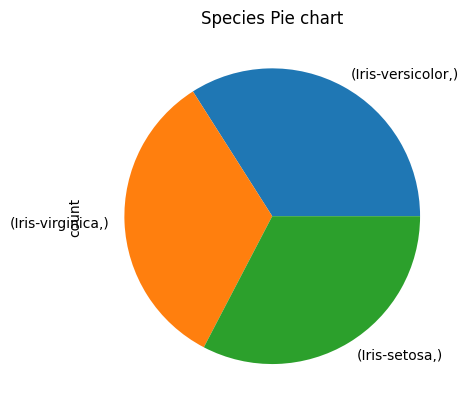

In [22]:
Y.value_counts().plot(kind='pie',title='Species Pie chart')

## Data Pre Processing
    1. Imputation to handle missing values
    2. Scaling of numerical data

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [23]:
pre = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                      ('scaler',StandardScaler())]).set_output(transform='pandas')

In [24]:
pre

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [25]:
X_pre = pre.fit_transform(X)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682
146,0.536792,-1.276136,0.695748,0.915085
147,0.778842,-0.128082,0.809831,1.047484
148,0.415766,0.790361,0.923913,1.444682


## Perform train test split to split the data into 75% training data and 25% testing data

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.25,random_state=21)

In [27]:
xtrain.shape

(110, 4)

In [28]:
xtest.shape

(37, 4)

In [29]:
ytrain.shape

(110, 1)

In [30]:
ytest.shape

(37, 1)

## Algorithm Evaluation
Lets check which alogirthm gives best results and choose that algorithm for model prediction

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
dct = {
    'Logistic' : LogisticRegression(),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier(),
    'KNN' : KNeighborsClassifier(),
    'SVC' : SVC()
}

In [39]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('SVC', SVC())])

In [40]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [58]:
train_cv = []
train_res = []
test_res = []

for name,model in dct.items():
    # fit the model
    model.fit(xtrain,ytrain)
    # calculate predicted score for Y
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # evaluate the model
    train_f1 = f1_score(ytrain,ypred_train,average='macro')
    test_f1 = f1_score(ytest,ypred_test,average='macro')
    # cross validate the trianing scores
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    score= scores.mean()
    # print the results
    print(f'Model : {name}')
    print(f'Training scores : {round(train_f1,2)}')
    print(f'Testing scores : {round(test_f1,2)}')
    print(f'Cross validated Training scores: {round(score,2)}')
    print('------------------------------------------')
    # Append above results in lists
    train_res.append(round(train_f1,2))
    test_res.append(round(test_f1,2))
    train_cv.append(round(score,2))

Model : Logistic
Training scores : 0.98
Testing scores : 0.91
Cross validated Training scores: 0.96
------------------------------------------
Model : DecisionTree
Training scores : 1.0
Testing scores : 0.94
Cross validated Training scores: 0.94
------------------------------------------
Model : RandomForest
Training scores : 1.0
Testing scores : 0.91
Cross validated Training scores: 0.96
------------------------------------------
Model : KNN
Training scores : 0.96
Testing scores : 0.94
Cross validated Training scores: 0.96
------------------------------------------
Model : SVC
Training scores : 0.97
Testing scores : 0.94
Cross validated Training scores: 0.97
------------------------------------------


## Create a dataframe to show the results and choose the best model 

In [61]:
res = {
    'Name' : list(dct.keys()),
    'Training Scores' : train_res,
    'Testing Scores' : test_res,
    'Training CV' : train_cv
}

In [62]:
df_res = pd.DataFrame(res)
df_res.sort_values('Training CV',ascending=False,inplace=True)

In [63]:
df_res

,Name,Training Scores,Testing Scores,Training CV
4,SVC,0.97,0.94,0.97
0,Logistic,0.98,0.91,0.96
2,RandomForest,1.00,0.91,0.96
3,KNN,0.96,0.94,0.96
1,DecisionTree,1.00,0.94,0.94


## SVC- Support Vector Classifier is providing highest cross validated training score. Lets consider that for final prediction

In [48]:
svc_model = SVC()
svc_model.fit(xtrain,ytrain)

SVC()

In [50]:
svc_model.score(xtrain,ytrain)

0.9727272727272728

In [51]:
svc_model.score(xtest,ytest)

0.9459459459459459

In [53]:
ypred_test1 = svc_model.predict(xtest)

## Plot Confusion Matrix Display and Classification report

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

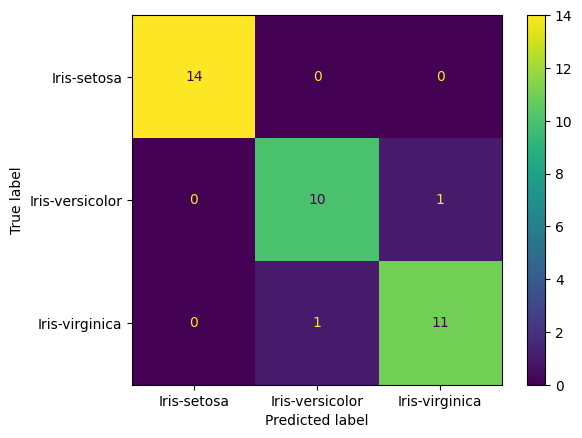

In [56]:
cm = confusion_matrix(ytest,ypred_test1)
ConfusionMatrixDisplay(cm,display_labels=svc_model.classes_).plot()

In [57]:
print(classification_report(ytest,ypred_test1,labels=svc_model.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37



In [64]:
ypred_test1[:10]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [65]:
ytest.head(10)

,species
7,Iris-setosa
64,Iris-versicolor
20,Iris-setosa
69,Iris-versicolor
134,Iris-virginica
46,Iris-setosa
19,Iris-setosa
67,Iris-versicolor
77,Iris-versicolor
79,Iris-versicolor


## As we can observe that the f1-score- macro avg is 0.94, accuracy is 0.95 . This is the best model. We can use this model for final predictions